# Car price Prediction

In [28]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics

In [30]:
# import the csv file to dataframe
car_df = pd.read_csv("F:\\Machine learning prediction\\car data.csv")

In [31]:
#inspect the first 5 rows of the dataframe
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
# numbers of the rows and columns in the dataframe
car_df.shape

(301, 9)

In [33]:
# getting the some information about the data
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [34]:
# checking the number of the missing values
car_df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [35]:
# checking the number of duplicate values 
car_df.duplicated().sum()

2

In [36]:
# drop the duplicate values
car_df.drop_duplicates(inplace = True)

In [37]:
# checking the number of duplicate values 
car_df.duplicated().sum()

0

In [38]:
car_df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [39]:
#checking the value counts for categorical data
print(car_df['Fuel_Type'].value_counts())
print(car_df['Transmission'].value_counts())
print(car_df['Seller_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64
Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64


### Encoding the categorical data

In [40]:
car_df = car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},
                'Transmission':{'Manual':0,'Automatic':1},
                'Seller_Type':{'Dealer':0,'Individual':1}})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5152\2507806275.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df = car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},


#### Fuel Type
Petrol ->0 , Diesel -> 1
#### Transmission
Manual -> 0 , Automatic -> 1
#### Seller Type 
dealer -> 0, Individual ->1

## Split the data and target

In [42]:
car_df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0


In [43]:
x= car_df.drop(columns = ['Car_Name','Selling_Price'],axis = 1)
y = car_df['Selling_Price']

In [44]:
print(x)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [45]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64


### Split the train and test data

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [47]:
print(x.shape,x_train.shape,x_test.shape)

(299, 7) (239, 7) (60, 7)


In [48]:
print(y.shape,y_train.shape,y_test.shape)

(299,) (239,) (60,)


# Model training

### 1. Linear regression

In [49]:
lr_model = LinearRegression()
lr_model

LinearRegression()

In [50]:
# train the linear regeression model 
lr_model.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [51]:
# predict the train data and accuracy value of train data
train_data_pred = lr_model.predict(x_train)

# train data r2_score
train_data_accuracy = metrics.r2_score(y_train,train_data_pred)

In [52]:
print("R2 Score on train data :",train_data_accuracy)

R2 Score on train data : 0.8830066323340687


In [53]:
# predict the test data 
test_data_pred = lr_model.predict(x_test)

#test data accuracy
test_data_accuracy = metrics.r2_score(y_test,test_data_pred)

In [54]:
print("R2 Score on test data :",test_data_accuracy)

R2 Score on test data : 0.789503078133785


Text(0.5, 1.0, 'Train data')

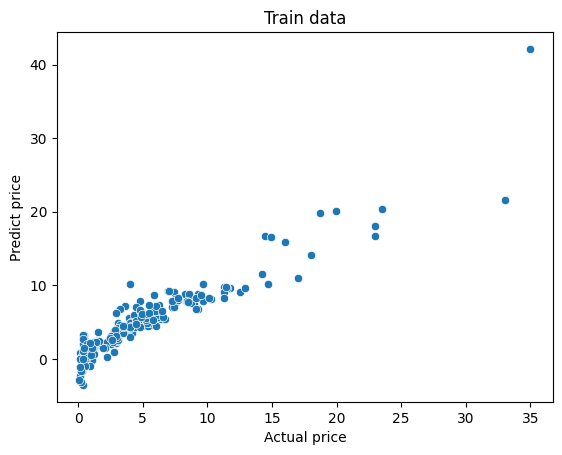

In [63]:
sns.scatterplot(x = y_train,y = train_data_pred)
plt.xlabel("Actual price")
plt.ylabel("Predict price")
plt.title("Train data")

Text(0.5, 1.0, 'Test data')

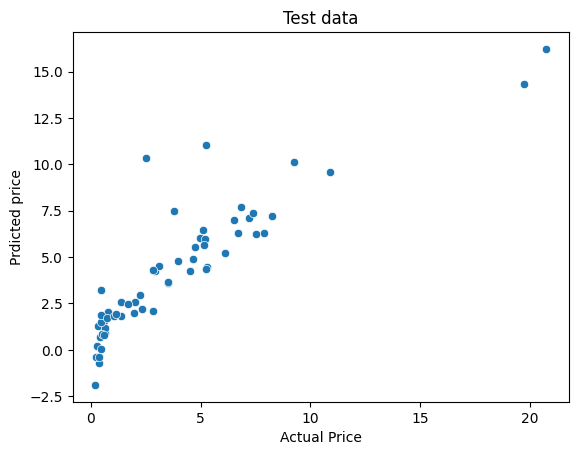

In [64]:
sns.scatterplot(x = y_test,y = test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Prdicted price")
plt.title("Test data")

# 2.Lasso 

In [55]:
ls = Lasso()
ls

Lasso()

In [56]:
ls.fit(x_train,y_train)

Lasso()

### Model evaluation

In [57]:
# predict the train data using lasso 
train_data_predict = ls.predict(x_train)

# r2 score on train data
train_data_acc = metrics.r2_score(y_train,train_data_predict)

In [58]:
print("R2 Score on the train data using lasso :",train_data_acc)

R2 Score on the train data using lasso : 0.852918983853887


In [59]:
# predict the test data using lasso 
test_data_prediction = ls.predict(x_test)

#r2 score on test data
test_data_acc = metrics.r2_score(y_test,test_data_prediction)

In [60]:
print("R2 Score on the test data using lasso :",test_data_acc)

R2 Score on the test data using lasso : 0.7388499970676015
